In [14]:
import pickle
import pandas as pd
import nltk
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_pickle('deception_df.pkl')


In [16]:
df.sample(3)


,messages,sender_labels,receiver_labels,speakers,receivers,absolute_message_index,relative_message_index,seasons,years,game_score,game_score_delta,players,game_id,politeness,negative_sentiment,neutral_sentiment,positive_sentiment,vader_score
6388,"So, did you veto the draw?",True,True,austria,russia,2553,59,Winter,1908,3,-2,"austria,russia",1,3.285523,0.0,1.0,0.0,0.0000
12285,Thanks 👍,True,True,england,turkey,395,49,Fall,1907,9,1,"england,turkey",5,4.208745,0.0,0.0,1.0,0.4404
1907,Austria is telling you imma attack you?,True,True,russia,turkey,200,9,Fall,1901,4,1,"russia,turkey",4,2.545142,0.0,1.0,0.0,-0.4767


In [17]:
df.describe()


,absolute_message_index,relative_message_index,game_id,politeness,negative_sentiment,neutral_sentiment,positive_sentiment,vader_score
count,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000
mean,948.323153,113.711782,5.401990,3.335989,0.175906,0.722599,0.101495,0.198434
std,750.710891,129.367961,3.778135,0.333862,0.330434,0.389223,0.267086,0.413414
min,0.000000,0.000000,1.000000,1.349828,0.000000,0.000000,0.000000,-0.973100
25%,360.000000,22.000000,2.000000,3.168758,0.000000,0.500000,0.000000,0.000000
50%,769.000000,65.000000,4.000000,3.297227,0.000000,1.000000,0.000000,0.177900
75%,1347.000000,152.000000,9.000000,3.461842,0.250000,1.000000,0.000000,0.510600
max,3301.000000,674.000000,12.000000,4.588426,1.000000,1.000000,1.000000,0.990900


In [18]:
def plot_distribution(df, target, hue, stat="density", title=""):
    """ 
    Plots distributions (using a histogram and a KDE plot) for the reputation and ratings variable, using arxiv as a hue
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=70)
    # Reputation (don't plot KDE in same subplot as hist as it's harder to discern)
    sns.histplot(df, ax=ax, x=target, hue=hue, multiple="layer", stat=stat, common_norm=False, kde=True)

    sns.despine(fig)
    fig.suptitle(title, fontsize=14)
    fig.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


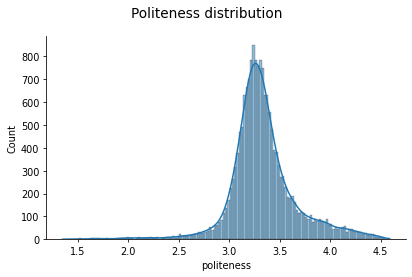

In [19]:
plot_distribution(df, target="politeness", hue=None, stat="count", title="Politeness distribution")


In [20]:
print(df.politeness.mean())
print(df.politeness.std())

3.3359895
0.33386218547821045


We note that the politeness follows a normal distribution with parameters with mean = 3.34 and std = 0.33 

In [32]:
for _, row in df.sort_values('politeness').head(15).iterrows():
    print(f"Score: {row['politeness']:.3f} | Message: {row['messages']}")

Score: 1.350 | Message: I will not fuck you over
Score: 1.422 | Message: What a clod you are. How in blue fuck does keeping Turkey in the game benefit you in the least.
Score: 1.449 | Message: Don’t fuck me over tho
Score: 1.468 | Message: You're a dick dude.  I will make sure that that's the last one you take.  I'll let E/G walk over me of I have to
Score: 1.477 | Message: I was getting you into Kiel. You made a bad decision, you ruined my game, and you can go fuck yourself.
Score: 1.497 | Message: You heartless bastard - I can't believe you took him from 5 to 0.
Score: 1.513 | Message: Eh fuck it, let’s not dick around with it.  See you after moves resolve!
Score: 1.518 | Message: If we do we’re fucks
Score: 1.520 | Message: I'm really pissed off, because I could have easily cut Kiel myself and guaranteed my staying even.  Instead, you lied to me and fucked me.  When you've got French fleets off of Liverpool, I don't understand why you'd do that, but fuck you bro.
Score: 1.526 | Mess

In [22]:
for _, row in df.sort_values('politeness').iloc[int(len(df)/4):,:].head(5).iterrows():
    print(f"Score: {row['politeness']:.3f} | Message: {row['messages']}")

Score: 3.169 | Message: Totally understand that, I don’t want to be allied with the Turks but warring them and Russia at the same time is a pain in the ass. I’m convinced that they are against Russia and will help me until they know russia will go down (which could very well only be this fall or fall and spring)
Score: 3.169 | Message: He’s a little salty with me for the Belgium thing
Score: 3.169 | Message: Okay I’m reading your proposal again and are you saying you would get all of russia?
Score: 3.169 | Message: If France is honest with me, Ruhr will be free and Bur will be occupied. 

Let's be real here, though: Russia has at most two units to spare to threaten you, and likely not even that given the imminent pressure from Austria. I'm trying to work it out in the sandbox now but I really don't think they'd be an issue for you...
Score: 3.169 | Message: Either I build armies and funnel through Scandinavia to help you or build fleets and take on Italy.


In [23]:
for _, row in df.sort_values('politeness').iloc[int(len(df)/2):,:].head(5).iterrows():
    print(f"Score: {row['politeness']:.3f} | Message: {row['messages']}")

Score: 3.297 | Message: Makes sense - Germany has some guessing games in there...
Score: 3.297 | Message: I don’t have an agreement with England, but he is asking me about my moves and trying to get my help.
Score: 3.297 | Message: Night!
Score: 3.297 | Message: I'm supporting you into Nth with one fleet
Score: 3.297 | Message: Hey! Not sure yet, if you're online in an hour let's talk then.  What up with you and Russia?


In [24]:
for _, row in df.sort_values('politeness').iloc[int(3*len(df)/4):,:].head(5).iterrows():
    print(f"Score: {row['politeness']:.3f} | Message: {row['messages']}")

Score: 3.462 | Message: Yeah, I think you'll be fine with Austria initially
Score: 3.462 | Message: You are correct, and that's why I want the army to go down there to help out silly head. Not sure where the confusion stems from.
Score: 3.462 | Message: Yeah I was thinking actually that it would make sense to put Russia into munich
Score: 3.462 | Message: Hey Italy, everything well over here. We probably won't be directly involved with each-other until mid-game, but if we're both still around, a France/Italy alliance could be pretty strong😉 .
Score: 3.462 | Message: Yeah prob either south coast or army. Im thinking an army could be good since I already have one fleet there


In [25]:
for _, row in df.sort_values('politeness', ascending=False).head(5).iterrows():
    print(f"Score: {row['politeness']:.3f} | Message: {row['messages']}")

Score: 4.588 | Message: Thanks, much appreciated - Hoping to work together more going forward!
Score: 4.584 | Message: Ok, thank you!
Score: 4.567 | Message: That would be great! Thanks!
Score: 4.566 | Message: Okay, thank you for letting me know. That helps!
Score: 4.554 | Message: Sounds great man! Thanks for everything!


In [26]:
 def term_count(txt, top_N):
    """Finds term frequencies for a list of words"""
    txt = txt.translate(str.maketrans('', '', string.punctuation+'’´'))
    words = nltk.tokenize.word_tokenize(txt)

    stopwords = nltk.corpus.stopwords.words('english')
    pattern = re.compile(txt, re.UNICODE | re.IGNORECASE)
    words = nltk.tokenize.word_tokenize(txt)

    words_dist = nltk.FreqDist(w for w in words if w not in stopwords+['england','russia','france','turkey','germany','italy','austria-hungary', 'austria'])

    rslt = pd.DataFrame(words_dist.most_common(top_N),
                        columns=['Word', 'Count'])
    display(rslt)

In [27]:
top_N = 10
txt = df.sort_values('politeness').head(100).messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, top_N)

,Word,Count
0,im,29
1,fuck,27
2,fucking,15
3,shit,14
4,game,11
5,fuckin,9
6,going,9
7,dont,8
8,two,8
9,army,8


In [29]:
top_N = 10
txt = df.sort_values('politeness').iloc[int(len(df)/2) - 50: int(len(df)/2) + 50,:].messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, top_N)

,Word,Count
0,im,27
1,want,11
2,would,11
3,sure,10
4,get,10
5,going,9
6,think,8
7,could,8
8,move,8
9,talk,7


In [33]:
top_N = 10
txt = df.sort_values('politeness', ascending=False).head(100).messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, top_N)

,Word,Count
0,thanks,48
1,thank,43
2,good,11
3,much,10
4,know,10
5,yes,10
6,great,8
7,help,8
8,forward,7
9,okay,7


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


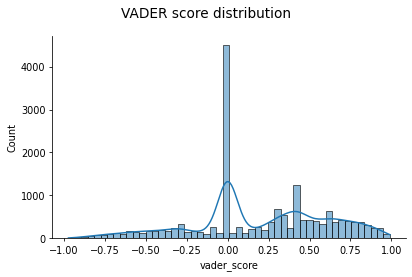

In [34]:
plot_distribution(df, target="vader_score", hue=None, stat="count", title="VADER score distribution")


This distribution is close to gaussian, most of the sentences showing neutral sentiments and negative sentiments not being very prominent which seems weird for this kind of game where people can easily get frustrated. We think that negative messages do happen but are balanced by the overall positive sentiments needed for the diplomatic aspect of the game.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


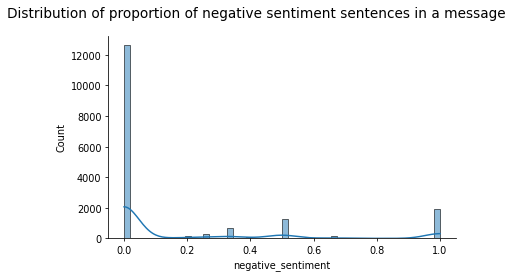

In [35]:
plot_distribution(df, target="negative_sentiment", hue=None, stat="count", title="Distribution of proportion of negative sentiment sentences in a message")


Here we can see that when a message has negative sentiment it seems to be very negative. When a player gets frustrated all the negativity seems to end up in one or multiple very negative messages.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


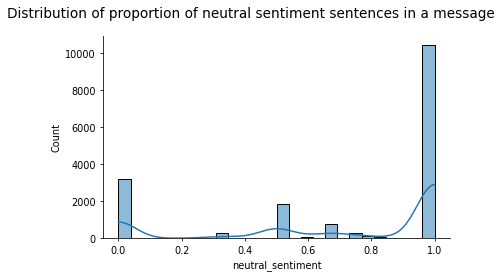

In [36]:
plot_distribution(df, target="neutral_sentiment", hue=None, stat="count", title="Distribution of proportion of neutral sentiment sentences in a message")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


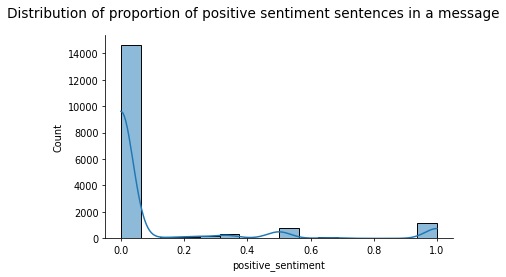

In [37]:
plot_distribution(df, target="positive_sentiment", hue=None, stat="count", title="Distribution of proportion of positive sentiment sentences in a message")


In [38]:
for _, row in df[df['negative_sentiment'] == 1.0].sample(10, random_state=0).iterrows():
    print(f"VADER score: {row['vader_score']:.3f} | Message: {row['messages']}")

VADER score: -0.523 | Message: Yah france’s game is a bit of a mess rn.  Sidebar- just signed up for a game on nexus!!!
VADER score: 0.296 | Message: Ok signing off for a few hours now.
VADER score: -0.296 | Message: I perceived Italy’s move in Tyr as an act of aggression against me.
VADER score: -0.477 | Message: StP(sc) can’t move to Nwy - it’s on the wrong coast as a fleet.
VADER score: -0.530 | Message: Sorry for the deception -- I only decided at the last minute and I also didn't want any leaks getting to Italy
VADER score: -0.309 | Message: I don't want to play that game
VADER score: -0.533 | Message: I think the dynamic does matter a bit, but I think as soon as Germany gambled hard for Belgium it made it very difficult to come to a deal with them
VADER score: -0.527 | Message: Oh no with me and you I was worried
VADER score: -0.459 | Message: Vacate Marseilles and then next turn I’ll help you kill France
VADER score: 0.000 | Message: If you don't mind me asking, are you getting 

In [39]:
for _, row in df[df['neutral_sentiment'] == 1.0].sample(10, random_state=0).iterrows():
    print(f"VADER score: {row['vader_score']:.3f} | Message: {row['messages']}")

VADER score: -0.586 | Message: Also, Italy is on board with a stab against France.
VADER score: 0.000 | Message: Dam Britain really got into the Med and North africa. Can you reclaim Tunis this turn?
VADER score: 0.273 | Message: Well, you’re right about that. Perhaps ask Germany to bounce with you in Edi?
VADER score: 0.735 | Message: I had an opportunity to DMZ the north, sorry. Though, now that England left North Sea as a retreat location, I might not find Norway such easy pickings ...
VADER score: 0.440 | Message: Lets talk about this.  Is it better for you, me or Italy to take it?
VADER score: 0.000 | Message: I think it's working though
VADER score: 0.421 | Message: If you can, please try to convince Austria and Italy to pursue the lepanto. Italy going west at the start fractures the west to the point that we can’t do much without incorporating Italy into our alliance, and Italy doesn’t strike me as an experienced player.
VADER score: 0.768 | Message: General thread says the game

In [40]:
for _, row in df[df['positive_sentiment'] == 1.0].sample(10, random_state=0).iterrows():
    print(f"VADER score: {row['vader_score']:.3f} | Message: {row['messages']}")

VADER score: 0.380 | Message: Sure!
VADER score: 0.493 | Message: Good game, mate!
VADER score: 0.836 | Message: Amazing.  This is such a great start
VADER score: 0.612 | Message: Well that literally couldn’t have gone better.
VADER score: 0.296 | Message: Yeah I mean it’s over soon ¯\_(ツ)_/¯
VADER score: 0.771 | Message: If you’re sincerely on board, this will be fun!
VADER score: 0.329 | Message: perhaps obvious but I thought worth saying it
VADER score: 0.000 | Message: We can try it
VADER score: 0.431 | Message: That’s not bad.
VADER score: 0.619 | Message: Yeah probably not a bad idea, we'll have to coordinate in the coming years


In [41]:
top_N = 15
txt = df[df['negative_sentiment'] == 1.0].messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, 15)

,Word,Count
0,im,294
1,would,167
2,dont,153
3,like,140
4,going,139
5,think,131
6,get,117
7,move,109
8,really,104
9,sure,92


In [42]:
top_N = 15
txt = df[df['neutral_sentiment'] == 1.0].messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, 15)

,Word,Count
0,im,1294
1,think,934
2,would,918
3,support,911
4,get,730
5,move,723
6,like,620
7,going,618
8,take,595
9,dont,576


In [43]:
top_N = 15
txt = df[df['positive_sentiment'] == 1.0].messages.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
term_count(txt, 15)

,Word,Count
0,good,220
1,sounds,117
2,f,110
3,thanks,79
4,like,72
5,im,70
6,well,66
7,great,55
8,mun,49
9,thats,42


We can observe some interesting things, for example:

* neutral messages seem to be very self oriented "I'm" occuring way more than in negative and positive sentences.
* the word 'really' is very used to express strong sentiments positive or negative.
* Besides some verbs, the vocabulary used is globally quite different between messages sentiment categories.

In [50]:
df["years"] = df["years"].astype(int)
df["game_score"] = df["game_score"].astype(int)
df["game_score_delta"] = df["game_score_delta"].astype(int)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


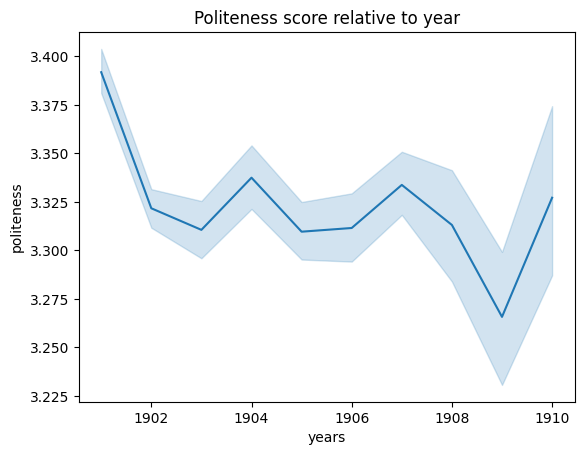

In [51]:
sns.lineplot(data=df, x="years", y="politeness")
plt.title("Politeness score relative to year")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


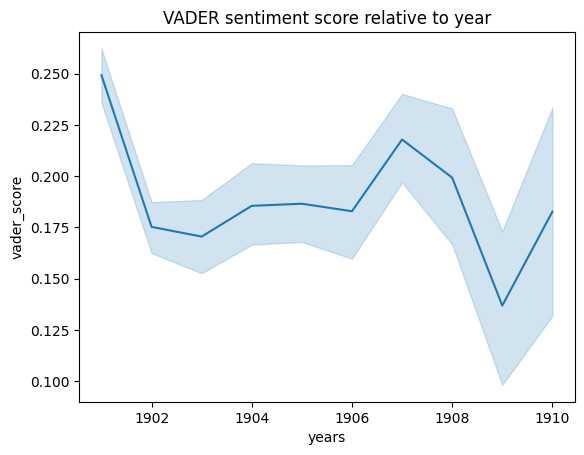

In [52]:
sns.lineplot(data=df, x="years", y="vader_score")
plt.title("VADER sentiment score relative to year")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


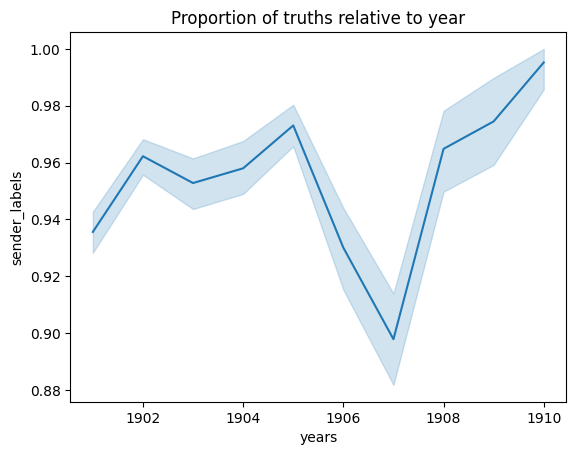

In [53]:
sns.lineplot(data=df, x="years", y="sender_labels")
plt.title("Proportion of truths relative to year")
plt.show()

This interesting plot shows a drop in people's trustworthiness around 1907. We do not really know how to explain it, but it might be the point in the game where stakes are high and where people benefit the most from betraying (close enough to the end to be able to get a solo victory, far enough from the beginning to reap most of the benefice from their alliance).


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


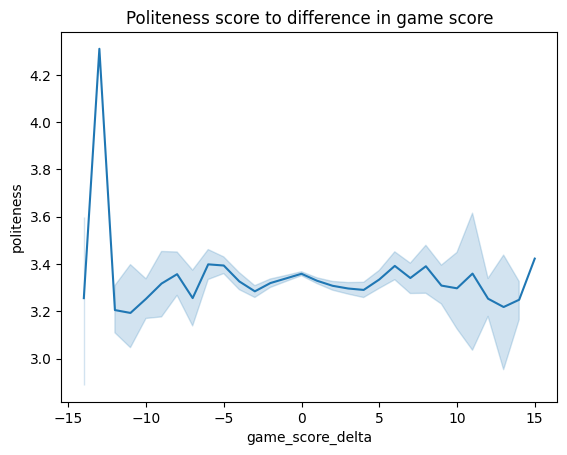

In [54]:
sns.lineplot(data=df, x="game_score_delta", y="politeness")
plt.title("Politeness score to difference in game score")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


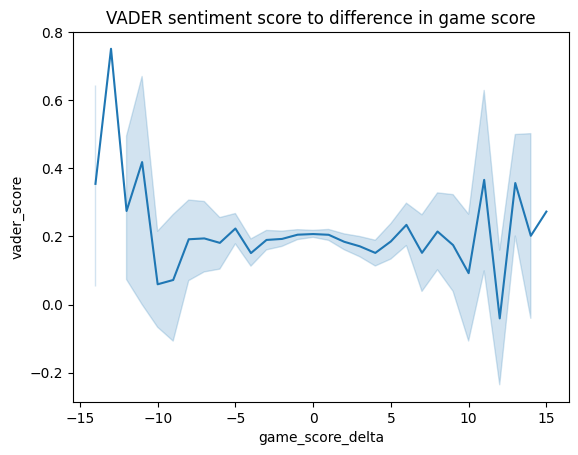

In [55]:
sns.lineplot(data=df, x="game_score_delta", y="vader_score")
plt.title("VADER sentiment score to difference in game score")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


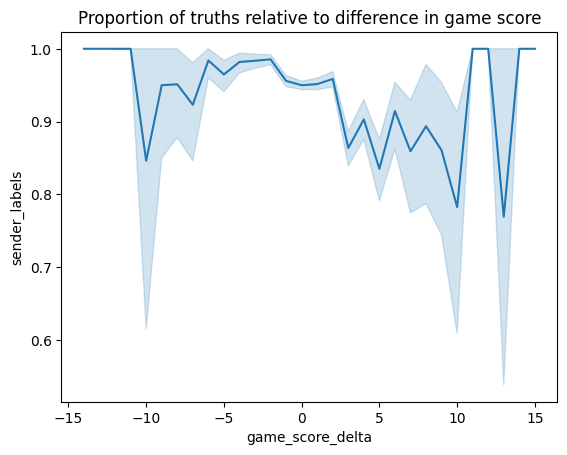

In [56]:
sns.lineplot(data=df, x="game_score_delta", y="sender_labels")
plt.title("Proportion of truths relative to difference in game score")
plt.show()

Here we can see that people in a balanced relationship tend to get a bit negligent and to perceive most of what they are told as the truth. This changes a lot as the imbalance grows: people tend to become more careful about what they read.

* The balanced relationship (around 0) part of the plot might be biased by the fact that each dyad starts the game at an equal game_score. With the interest of lying in the first seasons being low, this central part of the plot accounts mostly for a point in the game where lying is useless as the goal in the beginning of the game is to forge strong alliances which requires honesty.

* We can also explain the VADER sentiment score this way: the people in the beginning of the game (where score inbalance tend to be low) need to form alliances and therefore all of them use a quite similar sentimental language.